In [1]:
from model import BangladeshModel
import pandas as pd
import matplotlib.pyplot as plt
import time
import sys

In [2]:
# params = {'seed': range(1, 3), 'scenario_probabilities': [
#     {'A': 0, 'B': 0, 'C': 0, 'D': 0},  # Scenario 0
#     {'A': 0, 'B': 0, 'C': 0, 'D': 5},  # Scenario 1
#     {'A': 0, 'B': 0, 'C': 0, 'D': 10},  # Scenario 2
#     {'A': 0, 'B': 0, 'C': 5, 'D': 10},  # Scenario 3
#     {'A': 0, 'B': 0, 'C': 10, 'D': 20},  # Scenario 4
#     {'A': 0, 'B': 5, 'C': 10, 'D': 20},  # Scenario 5
#     {'A': 0, 'B': 10, 'C': 20, 'D': 40},  # Scenario 6
#     {'A': 5, 'B': 10, 'C': 20, 'D': 40},  # Scenario 7
#     {'A': 10, 'B': 20, 'C': 40, 'D': 80},  # Scenario 8
#     # Add more scenarios as needed
# ]}
# 
# results = mesa.batch_run(
#     BangladeshModel,
#     parameters=params,
#     iterations=1,
#     max_steps=100,
#     number_processes=1,
#     data_collection_period=100000,
#     display_progress=True,
# )

In [3]:
def run_all_scenarios(seeds, run_length, scenarios):
    sys.setrecursionlimit(9999999)
    all_scenario_results = {}
    for scenario_index, scenario in enumerate(scenarios, start=0):
        print(f"Running scenario {scenario_index} with probabilities {scenario}")
        batch_results = {}
        for seed in seeds:
            print("running seed", seed)
            model = BangladeshModel(seed=seed, scenario_probabilities=scenario)
            # print(model.scenario_probabilities)
            for i in range(run_length):
                model.step()
            bridges_data = [{"unique_id": bridge.unique_id,
                             "name": bridge.name,
                             'condition': bridge.condition,
                             'length': bridge.length,
                             'total_delay_time': bridge.total_delay_time,
                             "delay_time_per_vehicle": bridge.delay_time,
                             "break_down_chance": bridge.break_down_chance,
                             "breaks_down": bridge.breaks_down} for bridge in model.bridges]
            batch_results[seed] = pd.DataFrame(bridges_data)
        all_scenario_results[f"Scenario_{scenario_index}"] = batch_results
    return all_scenario_results


# Define your scenarios
scenarios = [
    {'A': 0, 'B': 0, 'C': 0, 'D': 0},  # Scenario 0
    {'A': 0, 'B': 0, 'C': 0, 'D': 5},  # Scenario 1
    {'A': 0, 'B': 0, 'C': 0, 'D': 10},  # Scenario 2
    {'A': 0, 'B': 0, 'C': 5, 'D': 10},  # Scenario 3
    {'A': 0, 'B': 0, 'C': 10, 'D': 20},  # Scenario 4
    {'A': 0, 'B': 5, 'C': 10, 'D': 20},  # Scenario 5
    {'A': 0, 'B': 10, 'C': 20, 'D': 40},  # Scenario 6
    {'A': 5, 'B': 10, 'C': 20, 'D': 40},  # Scenario 7
    {'A': 10, 'B': 20, 'C': 40, 'D': 80},  # Scenario 8
    # Add more scenarios as needed
]

# Set your seeds and run length
seeds = range(1, 3)  # 10 seeds for each scenario
# run_length = 5 * 24 * 60  # Example run length
run_length = 10
# Run all scenarios
all_scenario_results= run_all_scenarios(seeds, run_length, scenarios)


Running scenario 0 with probabilities {'A': 0, 'B': 0, 'C': 0, 'D': 0}
running seed 1
SourceSink1 GENERATE VehicleTruck0 +0 -None State.DRIVE(0) SourceSink1(1) 0
SourceSink1884 GENERATE VehicleTruck1 +0 -None State.DRIVE(0) SourceSink1884(1) 0
SourceSink2352 GENERATE VehicleTruck2 +0 -None State.DRIVE(0) SourceSink2352(1) 0
SourceSink2501 GENERATE VehicleTruck3 +0 -None State.DRIVE(0) SourceSink2501(1) 0
SourceSink2800 GENERATE VehicleTruck4 +0 -None State.DRIVE(0) SourceSink2800(1) 0
SourceSink4102 GENERATE VehicleTruck5 +0 -None State.DRIVE(0) SourceSink4102(1) 0
SourceSink1 GENERATE VehicleTruck6 +5 -None State.DRIVE(0) SourceSink1(1) 0
SourceSink1884 GENERATE VehicleTruck7 +5 -None State.DRIVE(0) SourceSink1884(1) 0
SourceSink2352 GENERATE VehicleTruck8 +5 -None State.DRIVE(0) SourceSink2352(1) 0
SourceSink2501 GENERATE VehicleTruck9 +5 -None State.DRIVE(0) SourceSink2501(1) 0
SourceSink2800 GENERATE VehicleTruck10 +5 -None State.DRIVE(0) SourceSink2800(1) 0
SourceSink4102 GENERATE

KeyboardInterrupt: 

In [16]:
#all_scenario_results['Scenario_7'][7][all_scenario_results['Scenario_7'][7]['breaks_down'] == True]

In [22]:
all_scenario_paths['Scenario_2'][1]

,"(1, 4102)","(1884, 2501)","(2352, 2501)","(2501, 2352)","(2800, 2501)","(4102, 1)","(1884, 2800)","(2352, 1)","(2501, 1)","(4102, 1884)",...,"(1, 1884)","(1884, 2352)","(2352, 4102)","(2800, 1)","(4102, 2352)","(1884, 1)","(2800, 4102)","(2501, 4102)","(1, 2352)","(2352, 1884)"
0,0 1.0 1 2.0 2 3.0 3...,0 1884 1 1883 2 1882 3 ...,0 2352 1 2351 2 2350 3 234...,0 2501 1 2500 2 2499 3 249...,0 2800 1 2799 2 2798 3 ...,0 4102.0 1 4101.0 2 4100.0 3...,0 1884 1 1883 2 1882 3 ...,0 2352 1 2351 2 2350 3 234...,0 2501.0 1 2500.0 2 2499.0 3 ...,0 4102.0 1 4101.0 2 4100.0 3...,...,0 1 1 2 2 3 3 ...,0 1884 1 1883 2 1882 3 ...,0 2352.0 1 2351.0 2 2350.0 3...,0 2800 1 2799 2 2798 3 ...,0 4102.0 1 4101.0 2 4100.0 3...,0 1884 1 1883 2 1882 3 ...,0 2800.0 1 2799.0 2 2798.0 3...,0 2501.0 1 2500.0 2 2499.0 3...,0 1 1 2 2 3 3 ...,0 2352 1 2351 2 2350 3 ...


In [ ]:
#all_scenario_results['Scenario_8'][7][all_scenario_results['Scenario_8'][7]['breaks_down'] == True]

In [18]:
all_results = all_scenario_results['Scenario_1'][1].copy()
all_results = all_results[['unique_id', 'name', 'condition', 'length', 'total_delay_time',
       'delay_time_per_vehicle', 'breaks_down']] #later delay_time_per_vehicle

for scenario in all_scenario_results:
    for iteration in all_scenario_results[scenario]:
        for index, row in all_scenario_results[scenario][iteration].iterrows():
            all_results.loc[index, f'delay_time_{scenario}_{iteration}'] = row.total_delay_time
            all_results.loc[index, f'breaks_down_{scenario}_{iteration}'] = row.breaks_down
            all_results.loc[index, f'delay_car_{scenario}_{iteration}'] = row.delay_time_per_vehicle

delay_time_columns = all_results.filter(regex='^delay_time_').columns
delay_car_columns = all_results.filter(regex='^delay_car').columns

all_results['total_delay_all_scenarios'] = all_results[delay_time_columns].sum(axis=1)
all_results['avg_delay_per_car'] = all_results[delay_car_columns].mean(axis=1)

# Select columns that start with 'breaks_down_'
breaks_down_columns = all_results.filter(regex='^breaks_down_').columns

# Count how often True appears in the breaks_down columns for each row
all_results['total_breakdowns'] = all_results[breaks_down_columns].apply(lambda x: x.value_counts().get(True, 0), axis=1)


all_results[['unique_id', 'name', 'condition', 'length',
       'avg_delay_per_car','total_delay_all_scenarios', 'total_breakdowns']]  # Show the result for the new columns

C:\Users\svenk\AppData\Local\Temp\ipykernel_73720\1193252037.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  all_results.loc[index, f'breaks_down_{scenario}_{iteration}'] = row.breaks_down
C:\Users\svenk\AppData\Local\Temp\ipykernel_73720\1193252037.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  all_results.loc[index, f'breaks_down_{scenario}_{iteration}'] = row.breaks_down
C:\Users\svenk\AppData\Local\Temp\ipykernel_73720\1193252037.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype 

,unique_id,name,condition,length,avg_delay_per_car,total_delay_all_scenarios,total_breakdowns
0,5,. id 5,A,0.0113,0.000000,0.000000,0
1,11,. id 11,A,0.0066,0.000000,0.000000,0
2,21,KANCHPUR PC GIRDER BRIDGE id 21,B,0.3970,1.808120,531.587278,3
3,27,NOYAPARA CULVERT id 27,B,0.0063,0.000000,0.000000,0
4,29,NAYABARI KASPUR BOX CULVERT id 29,A,0.0083,0.000000,0.000000,0
...,...,...,...,...,...,...,...
1377,4691,MOGLA BAZER id 4691,A,0.0208,1.026927,0.000000,1
1378,4697,NAIKHAI BOX CULVERT id 4697,A,0.0030,0.809765,0.000000,1
1379,4701,JALKER KANDI id 4701,B,0.0322,0.000000,0.000000,0
1380,4709,SIB BARI BOX CULVERT id 4709,A,0.0030,0.000000,0.000000,0


In [19]:
delay_data = []

for i in all_scenario_results:
    for j in all_scenario_results[i]:
        delay = all_scenario_results[i][j]['total_delay_time'].sum()
        delay_data.append({
        'scenario': i,
        'seed': j,
        'total_delay_time': delay
    })

delay_data = pd.DataFrame(delay_data, columns=['scenario', 'seed', 'total_delay_time'])
delay_data 

,scenario,seed,total_delay_time
0,Scenario_0,1,0.000000
1,Scenario_0,2,0.000000
2,Scenario_1,1,0.000000
3,Scenario_1,2,160.847078
4,Scenario_2,1,0.000000
5,Scenario_2,2,0.000000
6,Scenario_3,1,675.269324
7,Scenario_3,2,485.690332
8,Scenario_4,1,850.361106
9,Scenario_4,2,1516.830948


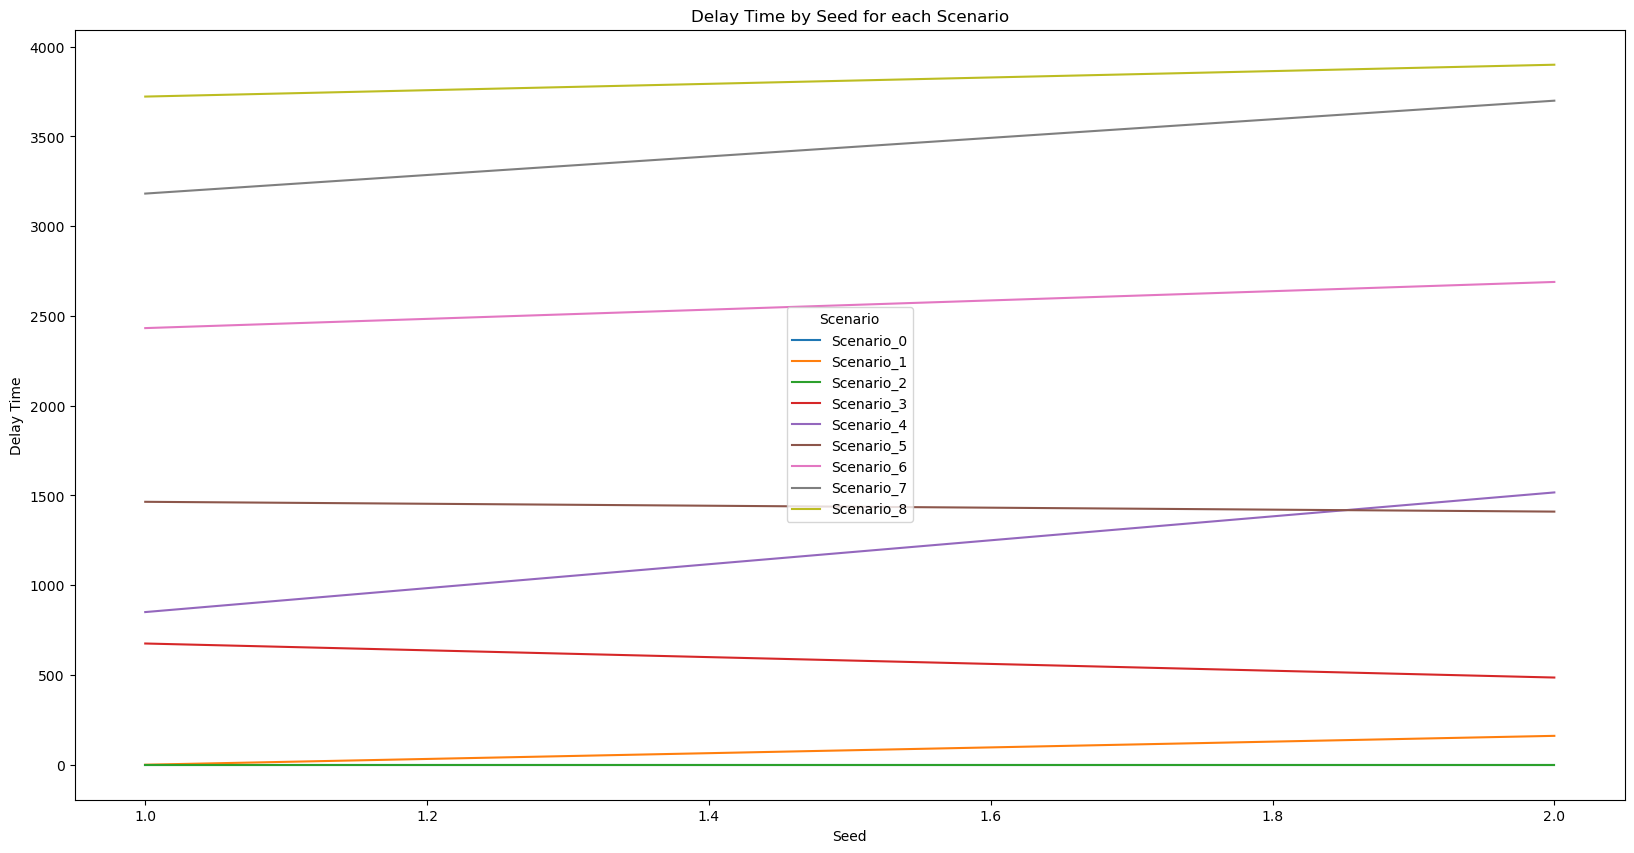

In [20]:
# Pivot the DataFrame so that each scenario has its own column for delay_time
pivot_df = delay_data.pivot(index='seed', columns='scenario', values='total_delay_time')

# Plotting
plt.figure(figsize=(20,10))

# Plot a line for each scenario
for scenario in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[scenario], label=scenario)

# Labeling the axes
plt.xlabel('Seed')
plt.ylabel('Delay Time')
plt.title('Delay Time by Seed for each Scenario')

# Add a legend to the plot
plt.legend(title='Scenario')

# Show the plot
plt.show()

In [21]:
average_delay = delay_data.groupby('scenario')['total_delay_time'].mean()
average_delay

scenario
Scenario_0       0.000000
Scenario_1      80.423539
Scenario_2       0.000000
Scenario_3     580.479828
Scenario_4    1183.596027
Scenario_5    1437.318513
Scenario_6    2560.813365
Scenario_7    3440.360822
Scenario_8    3810.732173
Name: total_delay_time, dtype: float64